# Quenching Franction
---------------------------------------

In this notebook, we study the quenching fraction as a function of the stellar mass and the cluster centric radii.

In [37]:
from file_loc import FileLocs

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.ascii as at

# Reading Initial Data

In [53]:
fl = FileLocs()
galaxy_file = fl.gal_fname1
# galaxy_file = '../data/groupCatalog_Yang_deCarvalho2017_galaxy_volumeLimited_v1'
cluster_file= fl.cls_fname

In [54]:
print('--------Initial Files-------')
print('Cluster File : %s'%cluster_file)
print('Galaxy File : %s'%galaxy_file)
print()

--------Initial Files-------
Cluster File : ../data/groupCatalog_Yang_deCarvalho2017.csv
Galaxy File : ../data/groupCatalog_Yang_deCarvalho2017_galaxy_v1.csv



In [55]:
# load catalogs
cat = at.read(cluster_file)
gal0= at.read(galaxy_file)

In [56]:
cat

Yang,RA,DEC,z,logM200,R200,N200
int64,float64,float64,float64,float64,float64,int64
2,240.5602,16.1113,0.036,15.29,2.01,525
4,247.1149,40.8317,0.03,14.66,1.24,217
5,247.1633,39.4674,0.03,14.81,1.4,277
6,167.6936,28.5374,0.033,14.6,1.18,167
7,351.1194,14.6251,0.042,14.51,1.1,106
8,239.5372,27.3133,0.09,15.1,1.71,183
9,241.5673,18.1483,0.038,14.48,1.08,143
10,223.2712,16.724,0.045,14.22,0.89,106
11,10.4693,-9.3997,0.056,14.96,1.55,156


# Mask Data
---------------------

In [58]:
mask = np.abs(gal0['vlosn'])<2.
mask&= gal0['ssfr']>-20
mask&= gal0['redshift']<0.085

Nsize = np.count_nonzero(mask)

print('Masking Galaxies')
print('New Size: %i'%(Nsize))
print('fraction: %.2f'%(1.*Nsize/len(gal0)))

Masking Galaxies
New Size: 13362
fraction: 0.41


In [59]:
gal = gal0[mask].copy()

## Magnitude Limit
---------------------------------------

Definit the mass limit of the study

In [60]:
mass = 10**np.array(gal['mass'])
z    = np.array(gal['z'])

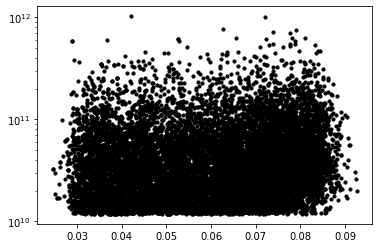

In [61]:
plt.scatter(z,mass,s=10,c='k')
plt.yscale('log')

In [62]:
gal

Yang,objid,specobjid,distance,ra,dec,mu,mg,mr,mi,mz,mu_Err,mg_err,mr_err,mi_err,mz_err,photo_z,photo_zErr,z,zErr,fracDeV_i,bpt,mass,mass_p16,mass_p84,sfr,sfr_p16,sfr_p84,ssfr,ssfr_p16,ssfr_p84,mass_fire,mass_fire_p16,mass_fire_p84,age_fire,age_fire_p16,age_fire_p84,score,row,redshift,M200,R200,R,Rn,vlos,vlosn,infall,orbital,interloper,pinfall,porbital,pinterloper,SF
int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,int64
2,1237665547827347728,2841891013398652928,66.9279962333088,240.988574304508,15.0749487080488,18.10222,16.55984,15.87389,15.51887,15.23896,0.03046442,0.00452454,0.003532456,0.003606966,0.00795144,0.046343,0.014991,0.03524532,1.029862e-05,0.5167674,1,10.31747,10.22748,10.41237,0.07491233,-0.09746825,0.2819673,-10.28968,-10.48632,-10.06143,6406905000.0,4934299000.0,7745638000.0,8277929000.0,6778579000.0,10976760000.0,0.8717796,5,0.036,15.29,2.01,2.875014705996323,1.430355575122549,-218.38549440486503,-0.10693324963996216,1,0,0,0.78,0.14,0.08,1
2,1237665566081483195,2838400888110868480,90.4464881468585,240.713424596535,14.6111162264233,17.71942,16.36608,15.73907,15.40933,15.13747,0.02493478,0.004048082,0.003419265,0.003449163,0.007783792,0.04369,0.012716,0.03736607,1.491802e-05,0.1406163,2,10.13713,10.05175,10.2355,-0.1388986,-0.4566603,0.1964595,-10.32625,-10.65404,-9.982267,2199423000.0,1791245000.0,4881733000.0,3430031000.0,2580399000.0,6528688000.0,0.9467953,7,0.036,15.29,2.01,3.885294617538927,1.9329823967855362,395.30645086878485,0.19356323784340831,1,0,0,0.87,0.0,0.13,1
2,1237665566081548691,2841874520724236288,91.5153203175785,240.861818228176,14.614028977464,18.32219,16.69393,15.93943,15.57824,15.30447,0.03610525,0.004809855,0.003709603,0.003675827,0.008213216,0.055527,0.017263,0.03548127,1.437615e-05,0.9202008,-1,10.11277,10.01669,10.20364,-1.265493,-2.603339,-0.6487934,-11.42083,-12.74024,-10.81532,7989685000.0,6855567000.0,8556743000.0,9227518000.0,7678189000.0,9877236000.0,0.9464893,10,0.036,15.29,2.01,3.9312082617835555,1.9558250058624655,-150.10747272040396,-0.07350066860886335,1,0,0,0.89,0.0,0.11,0
2,1237665566618419260,2841891563154466816,73.802168608806,240.970254216315,14.9464390274363,16.8343,15.07076,14.2641,13.86823,13.54384,0.01724369,0.002493925,0.002136988,0.002104899,0.003694906,0.033084,0.008575,0.03612468,9.095759e-06,0.9763039,5,10.87844,10.78511,10.96169,-1.250776,-2.561647,-0.4356033,-12.16615,-13.53977,-11.3569,17329540000.0,12568260000.0,19606680000.0,6028904000.0,3829858000.0,6978492000.0,0.9748663,23,0.036,15.29,2.01,3.1703073754827025,1.5772673509864192,36.07926994540599,0.01766634542469747,0,0,0,0.34,0.16,0.5,0
2,1237665566618419261,2841892387788187648,73.4541252319625,240.982855895897,14.9567734176736,17.29997,15.54685,14.74552,14.35258,14.04665,0.02065212,0.002853161,0.00238886,0.002334053,0.004386121,0.039419,0.009374,0.03630388,9.35446e-06,1.0,4,10.67776,10.58743,10.76346,-1.203882,-2.509871,-0.4318488,-11.9303,-13.22641,-11.15545,20977170000.0,15207770000.0,25629920000.0,8427864000.0,6978492000.0,8827691000.0,0.9748663,24,0.036,15.29,2.01,3.1553565345332504,1.5698291216583338,87.93526268054036,0.04305782040148356,1,0,0,0.64,0.06,0.3,0
2,1237665566618550527,2841899534613768192,87.3546363536509,241.223847619414,14.803419614292,18.29976,16.60295,15.79724,15.3936,15.09329,0.02620018,0.003921415,0.003258592,0.003170606,0.005958439,0.064037,0.015799,0.03500361,1.082556e-05,0.8581389,5,10.24801,10.15685,10.33702,-1.380493,-2.728722,-0.681649,-11.69677,-13.01786,-10.96518,16318930000.0,13905560000.0,16989310000.0,9977192000.0,8227951000.0,10327040000.0,0.9709203,42,0.036,15.29,2.01,3.7524784587636706,1.8669047058525727,-288.3303158558107

# Dynamical Classes
---------------------------------------


In [152]:
mass = np.array(gal['mass'])
sfr  = np.array(gal['sfr'])

rn   = np.array(gal['Rn'])
vn   = np.array(gal['vlosn'])

sf   = np.array(gal['SF'])

Pi   = np.array(gal['pinfall'])
Po   = np.array(gal['porbital'])
Pn   = np.array(gal['pinterloper'])

m200 = np.array(gal['M200'])

In [153]:
m200

array([15.29, 15.29, 15.29, ..., 14.21, 14.21, 14.21])

# Quenching Fraction
---------------------------------------

The Quenched Fraction Excess is defined as:
$$
 QFE_{2-1} = \frac{f_{q,1}-f{q,2}}{1-f_{q,1}} \;,
$$
where $f_{q,1}, f_{q,2}$ is the quiescent fraction in a stellar mass bin in
environment 1 and 2, respectively. A QFE of zero implies there is
no excess of quenched galaxies in one environment compared to the
other. A high QFE means that many of the star-forming galaxies
observed in environment 1 must be quenched in environment 2.
In the extreme case of QFE = 1, all of the galaxies that are starforming 
in environment 1 would be quenched were they to reside in environment 2.
<br> see:https://arxiv.org/pdf/2111.14624.pdf

In [195]:
def quenching_fraction_excess(p1,p2,quenching):
    """ Quenching Fraction Exceess
    We weight the probability of a galaxy
    residing in the enviroment 1 or 2 by 
    the probabilities p1,p2.
    """
    N1 = p1.size
    N2 = p2.size
    
    Nq1 = np.sum(p1*quenching)
    Nq2 = np.sum(p2*quenching)
    
    fq1 = Nq1/N1
    fq2 = Nq2/N2
    
    qfe = (fq2-fq1)/(1-fq1)
    return qfe

In [206]:
## mass bins
msbins = np.linspace(10.05,12.,13)

## radii bins
rbins = np.linspace(0.,2.,12)

In [207]:
def make_bins(x,xbins):
    indices = []
    xmd     = 0.5*(xbins[1:]+xbins[:-1])
    for xl,xh in zip(xbins[:-1],xbins[1:]):
        w, = np.where((x<=xh)&(x>xl))
        indices.append(w)
    return indices,xmd

In [208]:
mskeys, mmed = make_bins(mass,msbins)
rkeys, rmed  = make_bins(rn,rbins)

In [209]:
qfe_mass1 = [quenching_fraction_excess(Pi[idx],Po[idx],1-sf[idx]) for idx in mskeys]
qfe_mass2 = [quenching_fraction_excess(Pn[idx],Po[idx],1-sf[idx]) for idx in mskeys]
qfe_mass3 = [quenching_fraction_excess(Pn[idx],Pi[idx],1-sf[idx]) for idx in mskeys]

Text(0, 0.5, 'QFE')

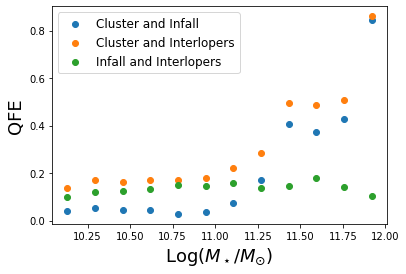

In [210]:
plt.scatter(mmed,qfe_mass1,label='Cluster and Infall')
plt.scatter(mmed,qfe_mass2,label='Cluster and Interlopers')
plt.scatter(mmed,qfe_mass3,label='Infall and Interlopers')
plt.legend(fontsize=12)
plt.xlabel(r'Log($M_\star/M_{\odot}$)',fontsize=18)
plt.ylabel('QFE',fontsize=18)

# plt.ylim(-0.02,1.2)

In [211]:
qfe_mass1 = [quenching_fraction_excess(Pi[idx],Po[idx],1-sf[idx]) for idx in rkeys]
qfe_mass2 = [quenching_fraction_excess(Pn[idx],Po[idx],1-sf[idx]) for idx in rkeys]
qfe_mass3 = [quenching_fraction_excess(Pn[idx],Pi[idx],1-sf[idx]) for idx in rkeys]

Text(0, 0.5, 'QFE')

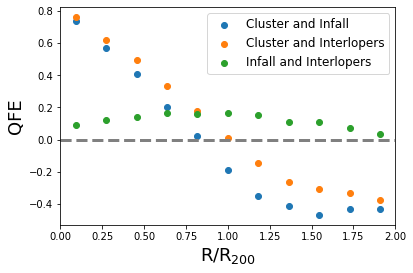

In [212]:
plt.scatter(rmed,qfe_mass1,label='Cluster and Infall')
plt.scatter(rmed,qfe_mass2,label='Cluster and Interlopers')
plt.scatter(rmed,qfe_mass3,label='Infall and Interlopers')

plt.axhline(0.,ls='--',lw=3,color='gray')
plt.legend(fontsize=12)
plt.xlabel(r'R/R$_{200}$',fontsize=18)
plt.ylabel('QFE',fontsize=18)

# plt.ylim(-0.02,1.2)

In [236]:
mbins = np.linspace(13.75,15.25,11)
mkeys, m2med = make_bins(m200,mbins)
mask = (mass>11.)&(rn<=1)

qfe_mass1 = [quenching_fraction_excess(Pi[idx][mask[idx]],Po[idx][mask[idx]],1-sf[idx][mask[idx]]) for idx in mkeys]
qfe_mass2 = [quenching_fraction_excess(Pn[idx][mask[idx]],Po[idx][mask[idx]],1-sf[idx][mask[idx]]) for idx in mkeys]
qfe_mass3 = [quenching_fraction_excess(Pn[idx][mask[idx]],Pi[idx][mask[idx]],1-sf[idx][mask[idx]]) for idx in mkeys]

Text(0, 0.5, 'QFE')

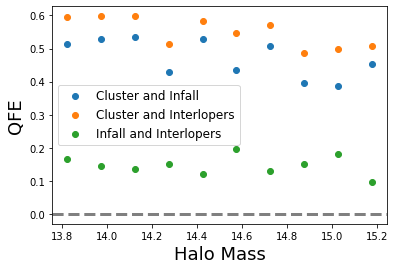

In [238]:
plt.scatter(m2med,qfe_mass1,label='Cluster and Infall')
plt.scatter(m2med,qfe_mass2,label='Cluster and Interlopers')
plt.scatter(m2med,qfe_mass3,label='Infall and Interlopers')

plt.axhline(0.,ls='--',lw=3,color='gray')
plt.legend(fontsize=12)
plt.xlabel(r'Halo Mass',fontsize=18)
plt.ylabel('QFE',fontsize=18)

# plt.ylim(-0.02,1.2)

In [239]:
age = np.array(gal['age_fire'])

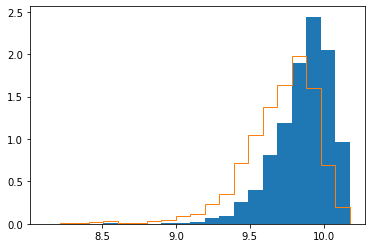

In [245]:
a = plt.hist(np.log10(age),weights=1-sf,bins=21,density=True)
_ = plt.hist(np.log10(age),weights=sf,bins=a[1],histtype='step',density=True)

In [98]:
def stellar_mass_function(m,norm,alpha,mstar):
    x = 10**m/10**mstar
    res = (norm/10**mstar) * (x**alpha) * np.exp(-x)
    return res

def log_stellar_mass_function(m,norm,alpha,mstar):
    return np.log(stellar_mass_function(m,norm,alpha,mstar))

In [109]:
## weighted poisson stats: https://core.ac.uk/download/pdf/207459783.pdf

def get_mass_function_data(mass,nbins=21,weights=None,eps=1e-6):
    #mbins = np.linspace(10.,np.max(mass),21)
    mbins = np.linspace(10.25,11.75,21)
    ncounts, _ = np.histogram(mass,bins=mbins)
    wcounts, _ = np.histogram(mass,bins=mbins,weights=weights)
    
    ## check w/ Arya my definition of weighted Poisson error
    weff = np.mean(weights**2)
    poisson_err = 1/(np.sqrt(ncounts*weff)+eps)
    mean = 0.5*(mbins[1:]+mbins[:-1])
    return mean,wcounts,poisson_err

In [110]:
smf = dict()

smf['orbital'] = get_mass_function_data(mass,nbins=21,weights=Po)
smf['infall'] = get_mass_function_data(mass,nbins=21,weights=Pi)
smf['interlopers']  = get_mass_function_data(mass,nbins=21,weights=Pn)

In [123]:
import scipy.optimize

x,y,yerr = smf['infall']

p0 = np.array([ 5.08547115e+13, -1.,  1.11960295e+01])
popt, pcov = scipy.optimize.curve_fit(
    log_stellar_mass_function, x, np.log(y), 
    bounds=((p0[0]-100,p0[1]-1.,p0[2]-2),\
            (p0[0]+100,p0[1]+1.,p0[2]+2)))

In [124]:
popt

array([ 5.08547115e+13, -5.88355452e-01,  1.10616048e+01])

Text(0.5, 1.0, 'Stellar Mass Function')

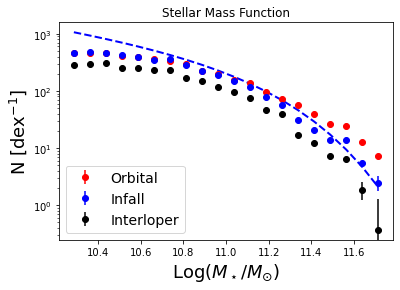

In [125]:
x,y,yerr = smf['orbital']
plt.errorbar(x,y,yerr=yerr,fmt='or',label='Orbital')

x,y,yerr = smf['infall']
plt.errorbar(x,y,yerr=yerr,fmt='ob',label='Infall')

x,y,yerr = smf['interlopers']
plt.errorbar(x,y,yerr=yerr,fmt='ok',label='Interloper')
plt.yscale('log')

plt.legend(fontsize=14)
plt.xlabel(r'Log($M_\star/M_{\odot}$)',fontsize=18)
plt.ylabel(r'N [dex$^{-1}$]',fontsize=18)


# popt = np.array([ 9.85471153e+12, -7.86930576e-01,  1.16259085e+01])
# popt = np.array([ 5.08547115e+13, -0.9,  1.10616048e+01])
plt.plot(x,stellar_mass_function(x,*popt),'b--',lw=2)
plt.title('Stellar Mass Function')

(0.001, 158.4893192461111)

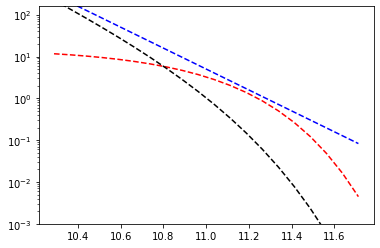

In [126]:
mstar=10.8
alpha=-2.5
norm = 10**12/(10**mstar)

plt.plot(x,norm*(10**x/10**mstar)**alpha,'b--')
plt.plot(x,norm*np.exp(-10**x/10**mstar),'r--')

plt.plot(x,norm*np.exp(-10**x/10**mstar)*(10**x/10**mstar)**alpha,'k--')

plt.yscale('log')
plt.ylim(1e-3,10*norm)

In [27]:
np.min(np.log(y))

-0.020202707316108803

In [28]:
popt

array([ 5.08547115e+13, -2.30595950e-01,  1.11960295e+01])